# <center>Produire une étude de marché avec Python

**Scénario :**<p>
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.<p>
L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

---

**Compétences évaluées :**<p>

- Effectuer un clustering simple :<p>
    - clustering avec avec la méthode ACP (Analyse en Composantes Principales)<p>
- Explorer des données pour synthétiser des variables :<p>
    - clustering avec avec la méthode CAH (Classification Ascendante Hiérarchique)<p>
    - clustering avec la méthode k-means<p>

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from functions import *

Données en open data issues du site de la [FAO (Food and Agriculture Organization)](https://www.fao.org/faostat/fr/#data/) 

## Fichier Population

In [2]:
pop = pd.read_csv('Population_2000_2018.csv')

In [3]:
pop.shape

(4411, 15)

In [4]:
#population du pays, exprimée en milliers d’habitants a passser en millions  * 1000
pop['Valeur'] = pop['Valeur'] * 1000

In [5]:
#renomer la colonne valeur (plus en milliers mais en millions)
pop = pop.rename(columns={"Valeur": "Population"})

In [6]:
#evolution sur 5 ans 2013=>2017
pop=pop.query('[2013, 2017] in Année')

In [7]:
#on ne garde que les colonnes utiles
pop=pop[['Zone','Année','Population']]

In [8]:
pop=pd.pivot_table(pop, values="Population", index=["Zone"], columns=["Année"])
pop=pop.set_axis(['2013', '2017'], axis = 1)

In [9]:
#pourcentage d'évolution sur 5ans entre 2013 et 2017
pop['Évolution Population(%)'] = round(((pop["2017"] - pop["2013"]))/ pop["2013"] *100, 2)

In [10]:
#on ne garde que les colonnes utiles
pop=pop[['Évolution Population(%)']]

In [11]:
pop.head()

,Évolution Population(%)
Zone,
Afghanistan,12.48
Afrique du Sud,6.19
Albanie,-0.68
Algérie,8.52
Allemagne,1.83


## Fichier Disponibilite Alimentaire

In [12]:
da = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [13]:
da.shape

(176600, 14)

In [14]:
#on de garde que la viande de volailles
da=da[(da["Produit"] == "Viande de Volailles")]

In [15]:
#on ne garde pas l'élément "Aliments pour animaux"
da=da.loc[~(da['Élément']== "Aliments pour animaux")]

In [16]:
#on ne garde pas l'élément "Semences"
da=da.loc[~(da['Élément']== "Semences")]

In [17]:
#création d'une colonne element + unité
da['Element'] = da['Élément'].map(str) + '-' + da['Unité']

In [18]:
#je ne garde que les colonnes utiles
da=da[['Zone','Element','Valeur']]

In [19]:
#je pivot mes données pour que les élements deviennent mes colonnes
da = da.pivot(index="Zone", columns="Element", values="Valeur")

In [20]:
da.head()

Element,Alimentation pour touristes-Milliers de tonnes,Autres utilisations (non alimentaire)-Milliers de tonnes,Disponibilité alimentaire (Kcal/personne/jour)-Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)-kg,Disponibilité de matière grasse en quantité (g/personne/jour)-g/personne/jour,Disponibilité de protéines en quantité (g/personne/jour)-g/personne/jour,Disponibilité intérieure-Milliers de tonnes,Exportations - Quantité-Milliers de tonnes,Importations - Quantité-Milliers de tonnes,Nourriture-Milliers de tonnes,Pertes-Milliers de tonnes,Production-Milliers de tonnes,Résidus-Milliers de tonnes,Traitement-Milliers de tonnes,Variation de stock-Milliers de tonnes
Zone,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,0.0
Afrique du Sud,0.0,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,-0.0
Albanie,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,4.0
Algérie,0.0,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,0.0
Allemagne,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,167.0,-29.0


## Fichier PIB par habitant

#### Enrichissement des données en intégrant une variable PIB par habitant

Ajouter un dimension économique</p>
https://www.fao.org/faostat/fr/#data/

In [21]:
#données l'année 2013 a 2017 issu du site de la FAO
pib = pd.read_csv('PIB_par_habitant_13-17.csv')

In [22]:
pib.shape

(1055, 15)

In [23]:
pib = pib.rename(columns={"Valeur": "PIB_US_$_par_habitant"})

In [24]:
#je ne garde que les années 2013 et 2017
pib=pib.query('[2013, 2017] in Année')

In [25]:
#on ne garde que les colonnes utiles
pib=pib[['Zone','Année','PIB_US_$_par_habitant']]

In [26]:
pib=pd.pivot_table(pib, values="PIB_US_$_par_habitant", index=["Zone"], columns=["Année"])
pib=pib.set_axis(['2013', '2017'], axis = 1)

In [27]:
#pourcentage d'évolution sur 5ans entre 2013 et 2017
pib['Évolution Pib(%)'] = round(((pib["2017"] - pib["2013"]))/ pib["2013"] *100, 2)

In [28]:
pib=pib[['Évolution Pib(%)']]

In [29]:
pib.head()

,Évolution Pib(%)
Zone,
Afghanistan,-15.62
Afrique du Sud,-10.36
Albanie,2.60
Algérie,-25.27
Allemagne,-3.11


In [30]:
pib.shape

(211, 1)

## Fichier Stabilité Politique

#### Enrichissement des données en intégrant une variable stabilité politique

Ajouter un dimension politique<p>
http://info.worldbank.org/governance/wgi/

In [31]:
#données l'année 2017 issu du site de la FAO
pol = pd.read_csv('stabilité_politique.csv')

In [32]:
pol.shape

(197, 15)

In [33]:
pol = pol.rename(columns={"Valeur": "Stabilité politique"})

In [34]:
#je ne garde que les colonnes utiles
pol=pol[['Zone','Stabilité politique']]

In [35]:
pol.head()

,Zone,Stabilité politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59


#### Fusion des dataset

In [36]:
# fusion des dataset da et pop
data = pd.merge(da, pop, how="left", on="Zone")

In [37]:
data.shape

(172, 16)

In [38]:
# ajout du dataset pib
data = pd.merge(data, pib, how="left", on="Zone")

In [39]:
data.shape

(172, 17)

In [40]:
# ajout du dataset pol
data = pd.merge(data, pol, how="left", on="Zone")

In [41]:
#on ne vas pas exporter en 'France'
data = data[data['Zone'] != 'France']

In [42]:
data.shape

(171, 19)

In [43]:
# je defini la zone comme index (pour n'avoir uniquement que des données quantitatives dans les variables)
data.set_index('Zone', inplace = True)

In [44]:
data.head()

,Alimentation pour touristes-Milliers de tonnes,Autres utilisations (non alimentaire)-Milliers de tonnes,Disponibilité alimentaire (Kcal/personne/jour)-Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)-kg,Disponibilité de matière grasse en quantité (g/personne/jour)-g/personne/jour,Disponibilité de protéines en quantité (g/personne/jour)-g/personne/jour,Disponibilité intérieure-Milliers de tonnes,Exportations - Quantité-Milliers de tonnes,Importations - Quantité-Milliers de tonnes,Nourriture-Milliers de tonnes,Pertes-Milliers de tonnes,Production-Milliers de tonnes,Résidus-Milliers de tonnes,Traitement-Milliers de tonnes,Variation de stock-Milliers de tonnes,Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,0.0,12.48,-15.62,-2.80
Afrique du Sud,0.0,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,-0.0,6.19,-10.36,-0.28
Albanie,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,4.0,-0.68,2.60,0.38
Algérie,0.0,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,0.0,8.52,-25.27,-0.92
Allemagne,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,167.0,-29.0,1.83,-3.11,0.59


In [45]:
#je remplace toute les données manquantes par la moyenne
data=data.fillna(data.mean())

In [46]:
data.head()

,Alimentation pour touristes-Milliers de tonnes,Autres utilisations (non alimentaire)-Milliers de tonnes,Disponibilité alimentaire (Kcal/personne/jour)-Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)-kg,Disponibilité de matière grasse en quantité (g/personne/jour)-g/personne/jour,Disponibilité de protéines en quantité (g/personne/jour)-g/personne/jour,Disponibilité intérieure-Milliers de tonnes,Exportations - Quantité-Milliers de tonnes,Importations - Quantité-Milliers de tonnes,Nourriture-Milliers de tonnes,Pertes-Milliers de tonnes,Production-Milliers de tonnes,Résidus-Milliers de tonnes,Traitement-Milliers de tonnes,Variation de stock-Milliers de tonnes,Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,44.117647,5.0,1.53,0.33,0.54,57.0,129.432836,29.0,55.0,2.00000,28.0,0.0,24.888889,0.0,12.48,-15.62,-2.80
Afrique du Sud,0.000000,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,24.888889,-0.0,6.19,-10.36,-0.28
Albanie,0.217949,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,24.888889,4.0,-0.68,2.60,0.38
Algérie,0.000000,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,24.888889,0.0,8.52,-25.27,-0.92
Allemagne,0.217949,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,167.000000,-29.0,1.83,-3.11,0.59


In [47]:
data.shape

(171, 18)

In [48]:
#je selectionne certaines variables
df=data[['Importations - Quantité-Milliers de tonnes','Disponibilité alimentaire (Kcal/personne/jour)-Kcal/personne/jour','Évolution Population(%)','Évolution Pib(%)','Stabilité politique']]

In [49]:
df=df.rename(columns={'Importations - Quantité-Milliers de tonnes':'Importations (Milliers de tonnes)','Disponibilité alimentaire (Kcal/personne/jour)-Kcal/personne/jour': 'Disponibilité alimentaire (Kcal/personne/jour)'})

In [50]:
#Vérification d'éventuelles valeurs manquantes et/ou en doubles dans l'échantillon
print(df.duplicated().sum())
print(df.isna().sum())

0
Importations (Milliers de tonnes)                 0
Disponibilité alimentaire (Kcal/personne/jour)    0
Évolution Population(%)                           0
Évolution Pib(%)                                  0
Stabilité politique                               0
dtype: int64


In [51]:
df.head()

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,
Afghanistan,29.0,5.0,12.48,-15.62,-2.80
Afrique du Sud,514.0,143.0,6.19,-10.36,-0.28
Albanie,38.0,85.0,-0.68,2.60,0.38
Algérie,2.0,22.0,8.52,-25.27,-0.92
Allemagne,842.0,71.0,1.83,-3.11,0.59


mes données correspondent a 171 pays et 5 variables :<p>
 - Importations et Disponibilité alimentaire =>l'alimentation<p>
 - Évolution de la population => Social<p>
 - Évolution du PIB => Economique<p>
 - Stabilité politique => Politique<p>

In [52]:
df.describe().round(2)

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
count,171.00,171.00,171.00,171.00,171.00
mean,87.07,74.46,5.50,0.35,-0.07
std,183.34,60.73,5.02,19.77,0.89
min,0.00,0.00,-5.43,-47.47,-2.94
25%,3.00,22.00,1.94,-9.50,-0.62
50%,16.00,63.00,4.88,-0.26,-0.04
75%,83.00,106.00,9.09,11.50,0.65
max,1069.00,243.00,23.94,73.44,1.59


#### Correlation

   - La couleur foncée représente une corrélation positive,
   - La couleur claire/blanche correspond à une corrélation négative.

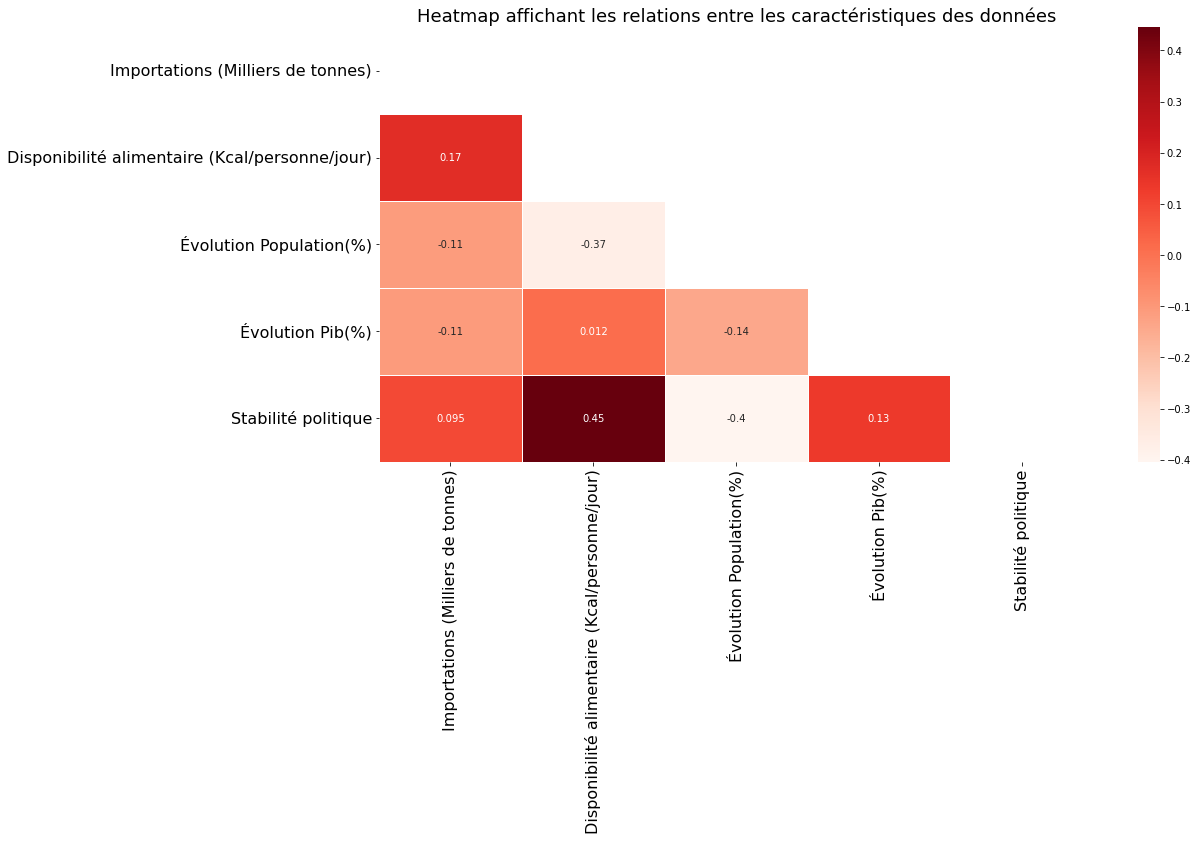

In [53]:
#recherche de corrélations entre les variables
fig, ax = plt.subplots(figsize=(16,8))
sb.heatmap(df.corr(), ax=ax,annot=True,cmap='Reds',linewidth=0.5,mask= np.triu(df.corr()))
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16)

plt.title('Heatmap affichant les relations entre les caractéristiques des données',fontsize=18)
plt.savefig("recherce de correlation.png", bbox_inches='tight')
plt.show()

Il n'y a uncune corélation forte entre nos differentes variables,elles sont independantes.

## **Réaliser une Classification ascendante hiérarchique ( CAH )**

In [54]:
from scipy.cluster.hierarchy import dendrogram , linkage,ward, fcluster
from sklearn import preprocessing

In [55]:
# préparation des données pour le clustering
X_cah=df.values

In [56]:
#générer la matrice des liens 
Z = linkage(X_cah,method='ward',metric='euclidean') 

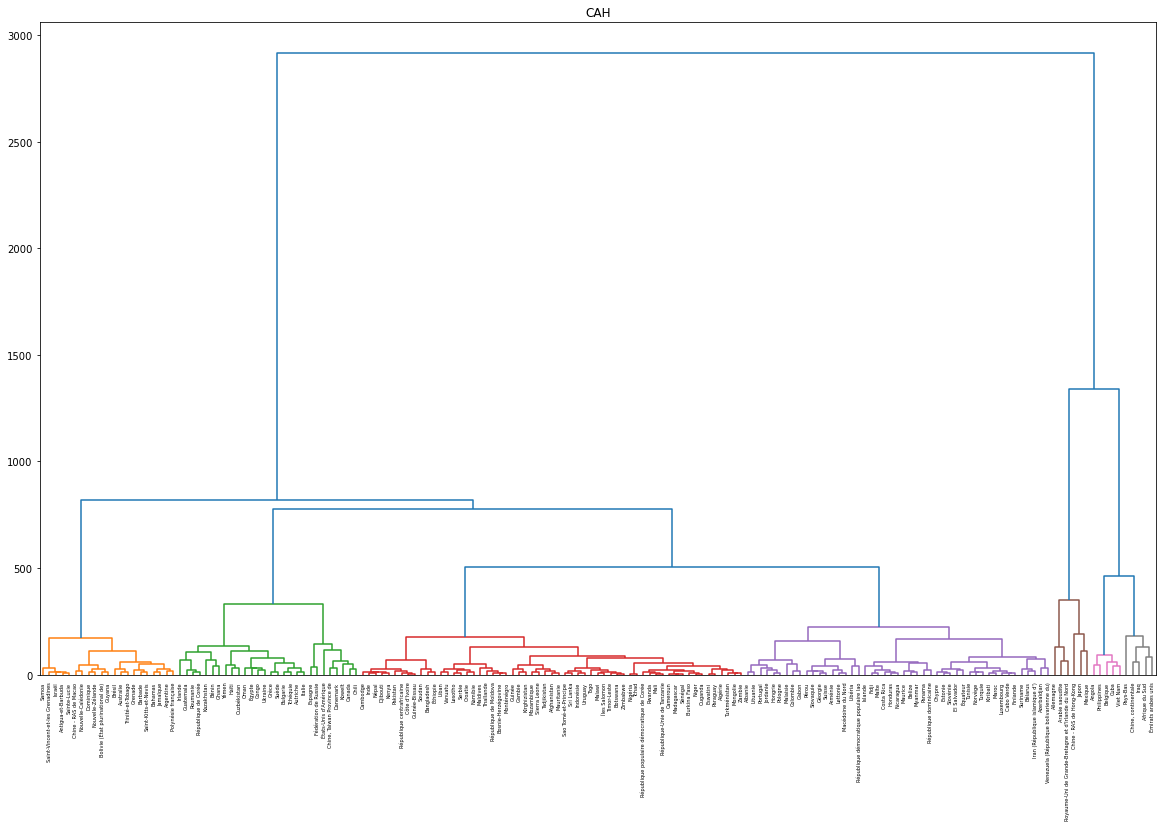

In [57]:
# génération et affichage du dendrogramme
plt.figure(figsize=(20,12))
plt.title("CAH") 
dendrogram(Z,labels=df.index,color_threshold=400)#decoupage du dendrogramme a la hauteur 400
plt.savefig("Dendrogramme_400.png", bbox_inches='tight')
plt.show()

In [58]:
#découpage à la hauteur t = 400 ==> 7 groupes obtenus
groupes_cah = fcluster(Z,t=400,criterion='distance')
print(np.unique(groupes_cah).size, "groupes constitués"," "+ str(np.unique(groupes_cah)))

7 groupes constitués  [1 2 3 4 5 6 7]


In [59]:
#index triés des groupes
idg= np.argsort(groupes_cah)

In [60]:
#affichage des pays par groupe
for i in range(1,8):
    print(f"Group {i}:")
    print(", ".join(df.index[groupes_cah == i].sort_values()))
    print(" ")

Group 1:
Antigua-et-Barbuda, Argentine, Australie, Bahamas, Barbade, Bolivie (État plurinational de), Brésil, Chine - RAS de Macao, Dominique, Grenade, Guyana, Israël, Jamaïque, Nouvelle-Calédonie, Nouvelle-Zélande, Polynésie française, Saint-Kitts-et-Nevis, Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Trinité-et-Tobago
 
Group 2:
Autriche, Bulgarie, Bénin, Canada, Chili, Chine, Taiwan Province de, Congo, Danemark, Espagne, Fédération de Russie, Ghana, Grèce, Guatemala, Haïti, Irlande, Italie, Kazakhstan, Koweït, Oman, Ouzbékistan, Roumanie, République de Corée, Suède, Tchéquie, Ukraine, Yémen, Égypte, États-Unis d'Amérique
 
Group 3:
Afghanistan, Algérie, Bangladesh, Bosnie-Herzégovine, Botswana, Burkina Faso, Cambodge, Cameroun, Croatie, Côte d'Ivoire, Djibouti, Eswatini, Gambie, Guinée, Guinée-Bissau, Inde, Indonésie, Kenya, Kirghizistan, Lesotho, Liban, Madagascar, Malawi, Maldives, Mali, Mauritanie, Mongolie, Monténégro, Mozambique, Namibie, Niger, Nigéria, Népal, Ouganda

In [61]:
#création et intégration d'une colonne "groupe" dans le df
df_groupes_cah = pd.DataFrame(df.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})
df_cah = pd.merge(df, df_groupes_cah, on='Zone')

In [62]:
#Affichage du nombre de pays par groupe
df_groupes_cah.groupby('Groupe').count()

,Zone
Groupe,
1,21
2,28
3,59
4,47
5,6
6,5
7,5


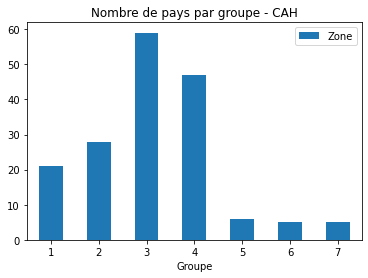

In [63]:
#Affichage du nombre de pays par groupe
df_groupes_cah.groupby('Groupe').count().plot.bar(rot=0)
plt.title("Nombre de pays par groupe - CAH")
plt.savefig("CAH_nb_pays.png")
plt.show()

In [64]:
#création d'un sous-ensemble pour chaque groupe
cah_1 = df_cah[df_cah['Groupe'] == 1]
cah_2 = df_cah[df_cah['Groupe'] == 2]
cah_3 = df_cah[df_cah['Groupe'] == 3]
cah_4 = df_cah[df_cah['Groupe'] == 4]
cah_5 = df_cah[df_cah['Groupe'] == 5]
cah_6 = df_cah[df_cah['Groupe'] == 6]
cah_7 = df_cah[df_cah['Groupe'] == 7]

In [65]:
#Comparaison des groupes en fonction de leur moyenne par variables
styles = [dict(selector="caption", props=[("font-size", "150%"),("font-weight", "bold")])]
df_cah.groupby('Groupe').mean().style.set_caption("Heatmap avec les clusters de pays et les différentes variables").set_table_styles(styles).format(precision=2).background_gradient(cmap = 'Reds')

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
Groupe,,,,,
1,10.19,187.19,3.44,4.11,0.55
2,128.22,81.75,4.86,-9.92,0.03
3,8.07,18.14,8.25,4.49,-0.54
4,29.21,84.51,3.60,0.04,0.17
5,881.83,123.67,3.69,-4.10,0.26
6,293.40,51.40,5.62,6.16,-0.03
7,495.40,94.20,5.15,-4.54,-0.22


Caractéristique des pays du groupe :<p>
 1 - forte Disponibilité alimentaire et faible importation, forte stabilité_politique et bon Évolution_Pib<p>
 2 - baisse importante du  Pib(%)<p>
 3 - forte Evolution Population et bon Évolution_Pib et très faible Disponibilité alimentaire et Stabilité politique<p>
 5 - forte Importations et bon Disponibilité alimentaire, bonne Stabilité politique<p>
 6 - fort Évolution_Pib et Importations au dessus de la moyenne<p>
 7 - importations importante<p>

### Analyse bivariée : Boxplot des variables en fonction des groupes

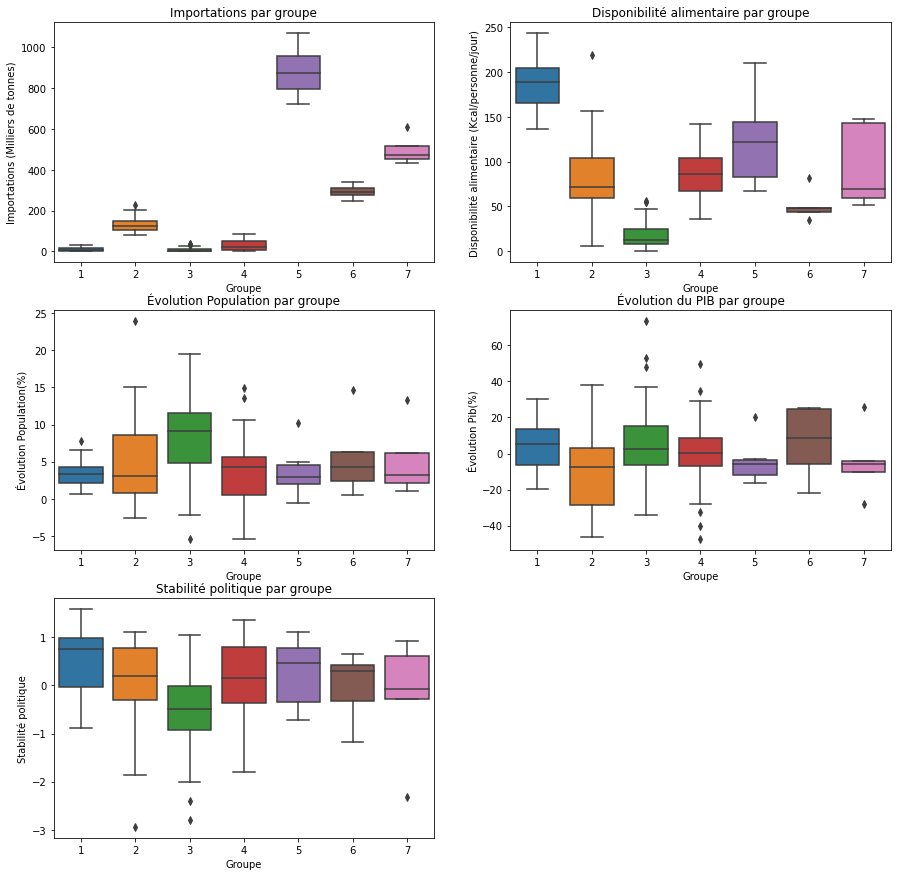

In [66]:
#Comparaison visuelle des groupes par Boxplot
plt.figure(figsize=(15, 15))

plt.subplot(321)
sb.boxplot(data=df_cah, x='Groupe', y='Importations (Milliers de tonnes)').set_title('Importations par groupe')

plt.subplot(322)
sb.boxplot(data=df_cah, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)').set_title('Disponibilité alimentaire par groupe')

plt.subplot(323)
sb.boxplot(data=df_cah, x='Groupe', y='Évolution Population(%)').set_title('Évolution Population par groupe')

plt.subplot(324)
sb.boxplot(data=df_cah, x='Groupe', y='Évolution Pib(%)').set_title('Évolution du PIB par groupe')

plt.subplot(325)
sb.boxplot(data=df_cah, x='Groupe', y='Stabilité politique').set_title('Stabilité politique par groupe')

plt.show(block=False)

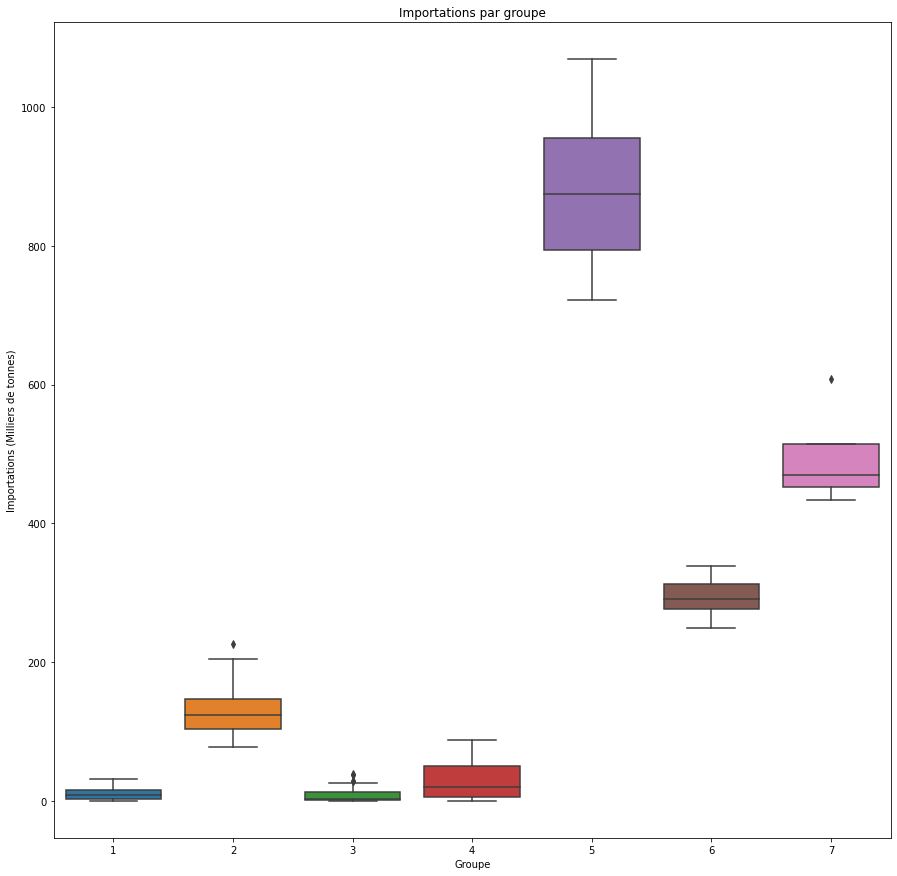

In [67]:
plt.figure(figsize=(15, 15))
sb.boxplot(data=df_cah, x='Groupe', y='Importations (Milliers de tonnes)').set_title('Importations par groupe')
plt.savefig("Importations_Boxplot.png")
plt.show()

In [68]:
#les pays du groupes 5  ont des importations très supérieur a leurs productions(grand besoin) et ont une bonne stabilité politique
print("Pays du groupe 5:")
print(cah_5['Zone'].unique())

Pays du groupe 5:
['Allemagne' 'Arabie saoudite' 'Chine - RAS de Hong-Kong' 'Japon'
 'Mexique' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [69]:
#definir la colone Zone comme index
cah_5.set_index('Zone', inplace=True)

In [70]:
# garder toutes les colonnes sauf "Groupe" et classer par "Importations"
selection=cah_5[['Importations (Milliers de tonnes)','Disponibilité alimentaire (Kcal/personne/jour)','Évolution Population(%)','Évolution Pib(%)','Stabilité politique']].sort_values(by='Importations (Milliers de tonnes)',ascending=False)

In [71]:
selection.style.set_caption("Sélection CAH").set_table_styles(styles).format(precision=2)

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,
Japon,1069.00,67.00,-0.63,-5.00,1.11
Mexique,972.00,123.00,5.01,-13.49,-0.72
Chine - RAS de Hong-Kong,907.00,210.00,3.07,20.09,0.83
Allemagne,842.00,71.00,1.83,-3.11,0.59
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.00,120.00,2.68,-6.84,0.33
Arabie saoudite,722.00,151.00,10.15,-16.27,-0.58


## **k-means**

In [72]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from scipy.spatial.distance import cdist

In [73]:
#Préparation des données pour le clustering K-Means
#Transformation en array Numpy
X = df.values

In [74]:
#Centrage / réduction des données

#Centrer les données est obligatoire pour une ACP => Centrer les données ne fait que déplacer (par une translation) le nuage de points de telle manière à ce que son centre de gravité coïncide avec l’origine du repère.
#Réduire est nécessaire car les variables ne sont pas  exprimées dans la même unité => accorder la même importance a chaque variable.
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Determiner le nombre de cluster dans notre dataset

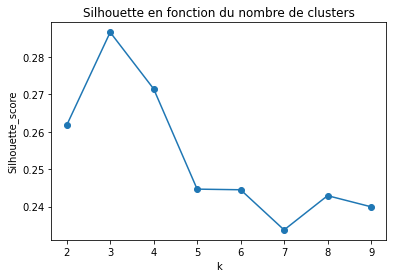

In [75]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.title("Silhouette en fonction du nombre de clusters")
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.savefig("KMeans_silhouette.png")
plt.show()

Le coeffficent est le plus elevé pour 3 clusters et décroît avec le nombre de cluster et remonte un peut pour 8.<p>
Ce graphique indique qu'il faudrait privilégier 3 ou 5 clusters ceux pour lequel le coefficient de silhouette est le plus elevé

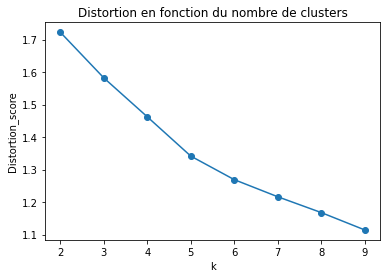

In [76]:
# k means determine k
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortion_score')
plt.title("Distortion en fonction du nombre de clusters")
plt.savefig("KMeans_distortion.png")
plt.show()

Le clustering ne s'améliore plus lorsque K augmente après 5.<p>
On observe un décrochement (coude) suivi d’une décroissance régulière.<p>
On sélectionne les axes avant le décrochement (k=4) .

In [77]:
#Clustering K-Means en 2 clusters
cls2 = cluster.KMeans(n_clusters=2)
cls2.fit(X_scaled)
y_kmeans2 = cls2.predict(X)

In [78]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_scaled)
y_kmeans3 = cls3.predict(X)

In [79]:
#Clustering K-Means en 4 clusters
cls4 = cluster.KMeans(n_clusters=4)
cls4.fit(X_scaled)
y_kmeans4 = cls4.predict(X)

In [80]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_scaled)
y_kmeans5 = cls5.predict(X)

In [81]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans5 = cls5.labels_

In [82]:
#Comparaison des clusters par les centroïdes (« centre » des clusters) (caractéristique moyenne du groupe)
centroids = cls4.cluster_centers_
df_centroides = pd.DataFrame(centroids, columns=df.columns)
df_centroides.style.set_caption("Centroïdes des classes").format(precision=2).highlight_max().set_table_styles(styles)

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
0,3.52,0.69,-0.41,-0.11,0.38
1,-0.36,-0.81,0.64,0.50,-0.49
2,-0.00,-0.36,0.69,-1.48,-0.94
3,-0.19,0.65,-0.68,0.18,0.66


Je retiens le groupe 0 sur les mêmes critères que pour la CAH , des importations nettement supérieures aux autres groupes.

In [83]:
#Index trié des clusters
idk = np.argsort(cls4.labels_)

#Affichage des observations selon leurs clusters
df_cls4 = pd.DataFrame(df.index[idk], cls4.labels_[idk]).reset_index()
df_cls4 = df_cls4.rename(columns={'index':'Cluster_K'})

In [84]:
#Intégration des clusters dans notre dataframe "df_cls4" 
df_cls4 = pd.merge(df, df_cls4, on='Zone')

In [85]:
#Taille des clusters
print(str(len(df_cls4[df_cls4['Cluster_K'] == 0]['Cluster_K'])) + " pays dans le cluster 0")
print(str(len(df_cls4[df_cls4['Cluster_K'] == 1]['Cluster_K'])) + " pays dans le cluster 1")
print(str(len(df_cls4[df_cls4['Cluster_K'] == 2]['Cluster_K'])) + " pays dans le cluster 2")
print(str(len(df_cls4[df_cls4['Cluster_K'] == 3]['Cluster_K'])) + " pays dans le cluster 3")

10 pays dans le cluster 0
57 pays dans le cluster 1
28 pays dans le cluster 2
76 pays dans le cluster 3


In [86]:
#Affichage des pays retenus dans ce clustering

print(df_cls4[df_cls4['Cluster_K'] == 0]['Zone'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Chine - RAS de Hong-Kong'
 'Chine, continentale' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']


In [87]:
#définir la "Zone" comme index
df_cls4.set_index('Zone', inplace=True)

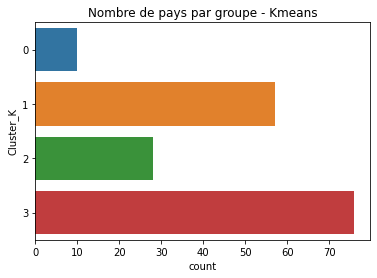

In [88]:
#taille des clusters obtenus
sb.countplot(y=df_cls4.Cluster_K, data=df_cls4)
plt.title("Nombre de pays par groupe - Kmeans")
plt.savefig("Kmeans_nb_pays.png")
plt.show()

In [100]:
#Création d'un sous-ensemble avec sélection des pays du clusters 0
df_cls4_select = df_cls4[df_cls4['Cluster_K'] == 0]
df_cls4_select.shape

(10, 6)

In [101]:
df_cls4_select=df_cls4_select[['Importations (Milliers de tonnes)','Disponibilité alimentaire (Kcal/personne/jour)','Évolution Population(%)','Évolution Pib(%)','Stabilité politique']].sort_values(by='Importations (Milliers de tonnes)',ascending=False)

In [102]:
#fonction pour mettre les index d'une liste en surbrillance
def color(s):

    return "background-color: yellow;" if s in ['Afrique du Sud','Chine, continentale','Pays-Bas','Émirats arabes unis'] else None

In [103]:
# Résultats du Kmeans comprarés aux résultats CAH (6 pays en commun + 4 en surbrillance)
df_cls4_select.style.set_caption("Sélection Kmeans").set_table_styles(styles).format(precision=2).applymap_index(color)  

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,
Japon,1069.00,67.00,-0.63,-5.00,1.11
Mexique,972.00,123.00,5.01,-13.49,-0.72
Chine - RAS de Hong-Kong,907.00,210.00,3.07,20.09,0.83
Allemagne,842.00,71.00,1.83,-3.11,0.59
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.00,120.00,2.68,-6.84,0.33
Arabie saoudite,722.00,151.00,10.15,-16.27,-0.58
Pays-Bas,608.00,70.00,1.06,-5.90,0.92
Afrique du Sud,514.00,143.00,6.19,-10.36,-0.28
"Chine, continentale",452.00,59.00,2.09,25.99,-0.07


## Visualisation des clusters en ACP pour la projection des données

reduire  la dimension du dataframe a 2 composantes principales afin de pouvoir visuliser le resultat dans un plan 2D

In [93]:
#Calcul des composantes principales (coordonées des individus sur les axes de rang)
pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

PCA(svd_solver='full')

In [94]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.37758007 0.2257388  0.16509105 0.12454459 0.10704549]


La première composante explique environ 38% de la variance observée dans les données, la deuxième explique 22%.<p>
Les 2 premières composantes principales expliquent 60% de la variance.

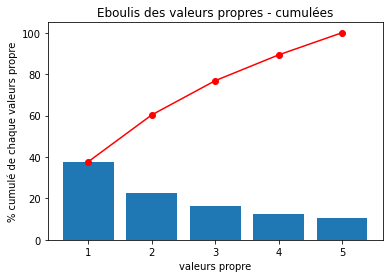

In [95]:
#Représentation de la variance expliquée en fonction du nombre de composantes (information = inertie = variance a plusieurs dimensions)
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("valeurs propre")
plt.ylabel("% cumulé de chaque valeurs propre")
plt.title("Eboulis des valeurs propres - cumulées")
plt.savefig("Eboulis des valeurs propres.png")
plt.show()

L’examen des plans factoriels permet de visualiser les corrélations entre les variables et d’identifier les groupes d’individus

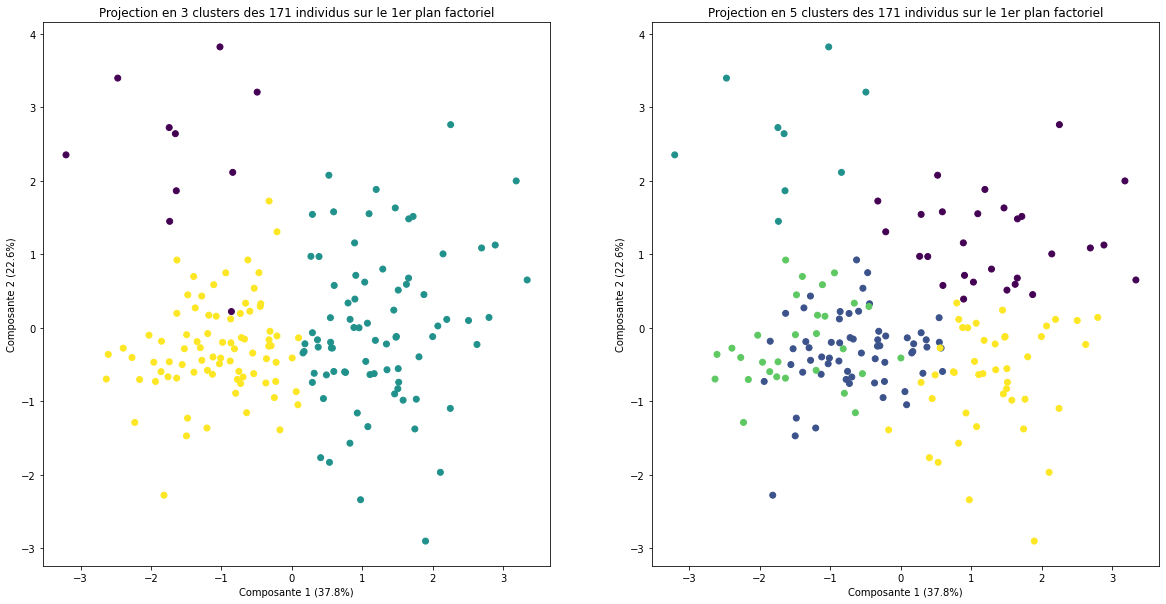

In [96]:
## Projection des individus
plt.figure(figsize=(20, 10))

X_projected = pca.transform(X_scaled)

plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls3.labels_)
plt.xlabel('Composante {} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('Composante {} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls5.labels_)
plt.xlabel('Composante {} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('Composante {} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("Projection_3+5_clusters.png")
plt.show()

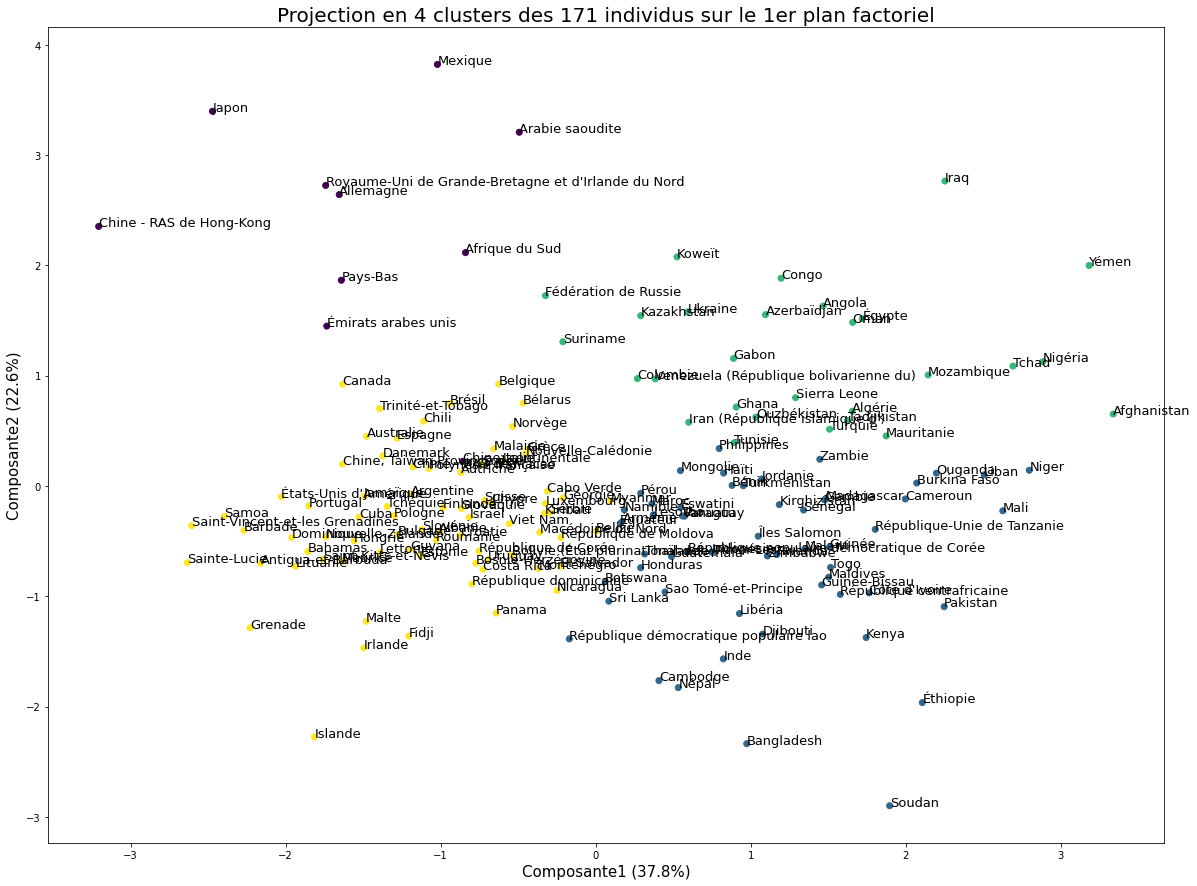

In [97]:
#Projection des 4 clusters sur le premier plan factoriel (F1, F2)


plt.figure(figsize=(20, 15))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls4.labels_)
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, df.index[i], fontsize='13') 

plt.xlabel('Composante{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('Composante{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=20)

plt.savefig("Projection_cluster_4.png")
plt.show()

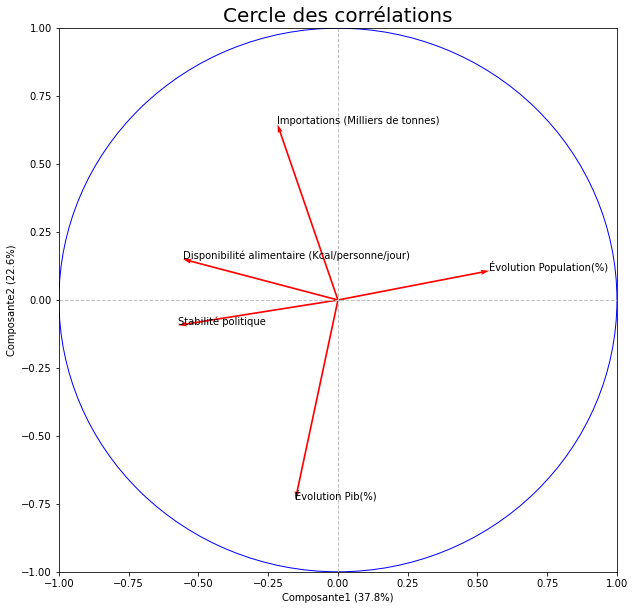

In [98]:
#Cercle des corrélations de nos variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

#Ajout des flèches
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_cls4_select.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('Composante{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('Composante{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("Cercle des corrélations K1.png")
plt.show()

Auncunes variables n'est fortement corrélées a un axe (proche d'un axe) ni bien représentés (proche du cercle).<p>
Les variables Évolution Population , Disponibilité alimentaire et Stabilité politique sont moyennement corrélées a l'axe 1.<p>
Les variables Importation et Évolution Pib sont moyennement corrélées a l'axe 2.

>Variables non liées ( les flèches forment un angle droit):
>>Importation et Évolution Population / Importation et Stabilité politique / Disponibilité alimentaire et Évolution Pib

>Relations négatives (les flèches forment un angle obtus):
>>quand la population augmente la disponibilité alimentaire  diminue<p> 
>>quand les importations  augmentent le Pib diminue

## Séléction finale

In [99]:
selection.style.set_caption("Sélection finale").set_table_styles(styles).format(precision=2)

,Importations (Milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Évolution Population(%),Évolution Pib(%),Stabilité politique
Zone,,,,,
Japon,1069.00,67.00,-0.63,-5.00,1.11
Mexique,972.00,123.00,5.01,-13.49,-0.72
Chine - RAS de Hong-Kong,907.00,210.00,3.07,20.09,0.83
Allemagne,842.00,71.00,1.83,-3.11,0.59
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.00,120.00,2.68,-6.84,0.33
Arabie saoudite,722.00,151.00,10.15,-16.27,-0.58


>Pays commun au deux methodes de clustering qui ont les importations les plus importantes

>Les pays européens (Allemagne et Royaume-Uni) peuvent faire une première cible car le marché est accessible